# SparkMagic

In [1]:
%help

Magic,Example,Explanation
info,%%info,Outputs session information for the current Livy endpoint.
cleanup,%%cleanup -f,"Deletes all sessions for the current Livy endpoint, including this notebook's session. The force flag is mandatory."
delete,%%delete -f -s 0,Deletes a session by number for the current Livy endpoint. Cannot delete this kernel's session.
logs,%%logs,Outputs the current session's Livy logs.
configure,"%%configure -f{""executorMemory"": ""1000M"", ""executorCores"": 4}",Configure the session creation parameters. The force flag is mandatory if a session has already been created and the session will be dropped and recreated.Look at Livy's POST /sessions Request Body for a list of valid parameters. Parameters must be passed in as a JSON string.
spark,%%spark -o dfdf = spark.read.parquet('...,"Executes spark commands. Parameters: -o VAR_NAME: The Spark dataframe of name VAR_NAME will be available in the %%local Python context as a Pandas dataframe with the same name. -m METHOD: Sample method, either take or sample. -n MAXROWS: The maximum number of rows of a dataframe that will be pulled from Livy to Jupyter. If this number is negative, then the number of rows will be unlimited. -r FRACTION: Fraction used for sampling."
sql,%%sql -o tables -qSHOW TABLES,"Executes a SQL query against the variable sqlContext (Spark v1.x) or spark (Spark v2.x). Parameters: -o VAR_NAME: The result of the SQL query will be available in the %%local Python context as a Pandas dataframe. -q: The magic will return None instead of the dataframe (no visualization). -m, -n, -r are the same as the %%spark parameters above."
local,%%locala = 1,All the code in subsequent lines will be executed locally. Code must be valid Python code.


For more detailed command, please see https://docs.faculty.ai/how_to/spark/external_cluster.html

In [ ]:
%%configure -f 
{
    "name":"sparkmagic-demo",
    "kind": "spark",
    "executorMemory": "4G", 
    "executorCores": 4,
    "driverMemory": "1000M", 
    "numExecutors": 2
}

In [2]:
%%spark

// https://spark.apache.org/docs/2.1.0/sql-programming-guide.html
sc.version

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,None,spark,idle,,,✔


SparkSession available as 'spark'.
res2: String = 2.1.0

In [3]:
sc.setLogLevel("WARN")

In [4]:
spark.conf.get("spark.sql.catalogImplementation")

res4: String = in-memory

In [5]:
spark.conf.getAll.foreach(println)

(spark.driver.host,172.18.0.2)
(spark.livy.spark_major_version,2)
(spark.driver.port,34723)
(hive.metastore.warehouse.dir,file:/usr/spark-2.1.0/spark-warehouse/)
(spark.repl.class.uri,spark://172.18.0.2:34723/classes)
(spark.jars,file:/apps/livy-server-0.3.0/rsc-jars/livy-rsc-0.3.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/netty-all-4.0.29.Final.jar,file:/apps/livy-server-0.3.0/rsc-jars/unused-1.0.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/spark-tags_2.10-2.1.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-api-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/commons-codec-1.9.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-repl_2.11-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-core_2.11-0.3.0.jar)
(spark.repl.class.outputDir,/tmp/spark398781943972724046)
(spark.app.name,livy-session-2)
(spark.driver.memory,1000M)
(spark.executor.id,driver)
(spark.submit.deployMode,client)
(spark.yarn.maxAppAttempts,1)
(spark.master,local)
(spark.yarn.submit.waitAppCompletion,f

In [6]:
println(sc.version)
sc.getConf.getAll.
    foreach(println)
//     mkString("\n")

(spark.master,local)
(spark.sql.catalogImplementation,in-memory)
(spark.driver.port,34723)
(spark.yarn.submit.waitAppCompletion,false)
(spark.executor.id,driver)
(spark.executor.cores,2)
(spark.repl.class.uri,spark://172.18.0.2:34723/classes)
(spark.app.id,local-1601911973526)
(spark.driver.host,172.18.0.2)
(spark.repl.class.outputDir,/tmp/spark398781943972724046)
(spark.yarn.maxAppAttempts,1)
(spark.livy.spark_major_version,2)
(spark.app.name,livy-session-2)
(spark.submit.deployMode,client)
(hive.metastore.warehouse.dir,file:/usr/spark-2.1.0/spark-warehouse/)
(spark.jars,file:/apps/livy-server-0.3.0/rsc-jars/livy-rsc-0.3.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/netty-all-4.0.29.Final.jar,file:/apps/livy-server-0.3.0/rsc-jars/unused-1.0.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/spark-tags_2.10-2.1.0.jar,file:/apps/livy-server-0.3.0/rsc-jars/livy-api-0.3.0.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/commons-codec-1.9.jar,file:/apps/livy-server-0.3.0/repl_2.11-jars/livy-repl_2.1

# Examples

In [ ]:
import org.apache.spark.sql.Dataset
import spark.sqlContext.implicits._

val jsonInCSV: Dataset[String] = sc.parallelize(List(
  """
    |"a","b","c","{""x"":""xx"",""y"":""yy""}"
  """.stripMargin)).toDS()

val df = spark.read.option("escape", "\"").csv(jsonInCSV)
df.show()

In [7]:
val value = "[\"1978-08-19T19:08:08.788Z\",\"2020-08-19T19:08:08.788Z\"]"
value.substring(2, value.indexOf(',')-1)

res10: String = 1978-08-19T19:08:08.788Z

In [8]:
import java.text.SimpleDateFormat

val pattern = "dd/MM/yyyy HH:mm"

val format = new SimpleDateFormat(pattern)
format.parse("01/01/2018 00:00").getTime()

res13: Long = 1514764800000

In [9]:
import java.text.SimpleDateFormat

def parseDateUDF(p: String) = udf(
  (value: String) => {
    val dateFormat = new SimpleDateFormat(p)
    val parsedDate = dateFormat.parse(value)
    new java.sql.Timestamp(parsedDate.getTime())
  }
)

val pattern = "dd/MM/yyyy HH:mm"

// Example data
val df = Seq(
  Tuple1("01/01/2018 00:00")
).toDF("stringTime")

val newDF = df.withColumn("timestamp", parseDateUDF(pattern)(df("stringTime"))).orderBy("timestamp")
newDF.printSchema()

root
 |-- stringTime: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)

# Data loading

### Create DataFrame from CSV file

In [10]:
// http://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=dataframereader#pyspark.sql.DataFrameReader.csv

val isoDatePattern = "yyyy-MM-dd'T'HH:mm:ss.SSS'Z'"
val datePattern = "yyyy-MM-dd HH:mm:ss.SSS"

val df = spark.read.
    option("header", "true").
    option("inferSchema", "true").
    option("delimiter", ",").
// Use this line to allow detect Date type
//     option("timestampFormat", datePattern).
// Use this line if one row can have line break
//     option("multiline",true).
// Use this line if one column has JSON confuse with delimiter 
//     option("escape", "\"").
    csv("file:///data/time_series_covid19_deaths_global_narrow.csv")

df: org.apache.spark.sql.DataFrame = [Province/State: string, Country/Region: string ... 8 more fields]

In [11]:
df.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Value: integer (nullable = true)
 |-- ISO 3166-1 Alpha 3-Codes: string (nullable = true)
 |-- Region Code: integer (nullable = true)
 |-- Sub-region Code: integer (nullable = true)
 |-- Intermediate Region Code: integer (nullable = true)

In [12]:
df.show(1, false)

+--------------+--------------+--------+---------+---------------------+-----+------------------------+-----------+---------------+------------------------+
|Province/State|Country/Region|Lat     |Long     |Date                 |Value|ISO 3166-1 Alpha 3-Codes|Region Code|Sub-region Code|Intermediate Region Code|
+--------------+--------------+--------+---------+---------------------+-----+------------------------+-----------+---------------+------------------------+
|null          |Afghanistan   |33.93911|67.709953|2020-10-01 00:00:00.0|1458 |AFG                     |142        |34             |null                    |
+--------------+--------------+--------+---------+---------------------+-----+------------------------+-----------+---------------+------------------------+
only showing top 1 row

### Type conversion

In [13]:
// Rename column to allow storing
val cleanDf = df.
    withColumnRenamed("ISO 3166-1 Alpha 3-Codes", "iso_country_code").
    withColumnRenamed("Region Code", "region_code").
    withColumnRenamed("Sub-region Code", "sub_region_code").
    withColumnRenamed("Intermediate Region Code", "interm_region_code").
    withColumnRenamed("Province/State", "province_state").
    withColumnRenamed("Country/Region", "country_region")

cleanDf.printSchema()

root
 |-- province_state: string (nullable = true)
 |-- country_region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Value: integer (nullable = true)
 |-- iso_country_code: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- sub_region_code: integer (nullable = true)
 |-- interm_region_code: integer (nullable = true)

In [ ]:
val cleanDf = df.
    withColumn("date", unix_timestamp($"date", datePattern).cast("timestamp"))
//     withColumn("timestamp", unix_timestamp($"date", datePattern).cast("timestamp")).
//     drop("date")

cleanDf.printSchema()

## Data Validation
### Check overall values

In [8]:
// filter data where the date is greater than 2020-09-01
val column = "sum_casualties"

val isoDF = tsDF.
    groupBy($"iso_country_code").
    agg(sum('casualties) as column).
    orderBy(desc(column))

isoDF.agg(sum(column)).
    show(false)

+-------------------+
|sum(sum_casualties)|
+-------------------+
|29129971           |
+-------------------+

### Column analysis

#### Numeric values

In [14]:
// OR df.describe().select("summary", "Lat").show()
df.agg(count("Lat"), mean("Lat"), stddev("Lat"), min("Lat"), max("Lat"), sum("Lat")).show()

+----------+-----------------+-----------------+--------+--------+
|count(Lat)|         avg(Lat)| stddev_samp(Lat)|min(Lat)|max(Lat)|
+----------+-----------------+-----------------+--------+--------+
|     67564|21.07662424812158|24.85792699104551|-51.7963| 71.7069|
+----------+-----------------+-----------------+--------+--------+

#### String values

In [15]:
// Cardinality
val distinctValuesDF = cleanDf.
    select($"iso_country_code", $"country_region", $"province_state", $"Lat", $"Long").
    distinct()
print(distinctValuesDF.count())

266

In [16]:
// Find redundancies
distinctValuesDF.groupBy("iso_country_code").count().orderBy(desc("count")).show()

+----------------+-----+
|iso_country_code|count|
+----------------+-----+
|             CHN|   31|
|             CAN|   12|
|             AUS|    8|
|            null|    5|
|             SPM|    1|
|             FRA|    1|
|             POL|    1|
|             TCA|    1|
|             LVA|    1|
|             JAM|    1|
|             ZMB|    1|
|             BRA|    1|
|             ARM|    1|
|             MOZ|    1|
|             JOR|    1|
|             CUB|    1|
|             ABW|    1|
|             SOM|    1|
|             BRN|    1|
|             COD|    1|
+----------------+-----+
only showing top 20 rows

In [17]:
// SELECT IS NULL
distinctValuesDF.where("iso_country_code is null").show()

+----------------+----------------+----------------+-------+-------+
|iso_country_code|  country_region|  province_state|    Lat|   Long|
+----------------+----------------+----------------+-------+-------+
|            null|  United Kingdom| Channel Islands|49.3723|-2.3644|
|            null|      MS Zaandam|            null|    0.0|    0.0|
|            null|Diamond Princess|            null|    0.0|    0.0|
|            null|          Canada|Diamond Princess|    0.0|    0.0|
|            null|          Canada|  Grand Princess|    0.0|    0.0|
+----------------+----------------+----------------+-------+-------+

In [18]:
// SELECT WHERE =
distinctValuesDF.where($"iso_country_code" === ("CHN")).show()

+----------------+--------------+--------------+------------------+--------+
|iso_country_code|country_region|province_state|               Lat|    Long|
+----------------+--------------+--------------+------------------+--------+
|             CHN|         China|      Xinjiang|           41.1129| 85.2401|
|             CHN|         China|        Shanxi|           37.5777|112.2922|
|             CHN|         China|       Guangxi|           23.8298|108.7881|
|             CHN|         China|         Hebei|            39.549|116.1306|
|             CHN|         China|      Shanghai|31.201999999999998|121.4491|
|             CHN|         China|         Hunan|           27.6104|111.7088|
|             CHN|         China|      Shandong|           36.3427|118.1498|
|             CHN|         China|       Beijing|           40.1824|116.4142|
|             CHN|         China|       Shaanxi|           35.1917|108.8701|
|             CHN|         China|         Tibet|           31.6927| 88.0924|

In [19]:
// SELECT WHERE IN & ORDER BY
distinctValuesDF.where($"iso_country_code" isin ("CAN", "AUS", "FRA", "USA")).
    orderBy(desc("iso_country_code")).
    show()

+----------------+--------------+--------------------+------------------+---------+
|iso_country_code|country_region|      province_state|               Lat|     Long|
+----------------+--------------+--------------------+------------------+---------+
|             USA|            US|                null|              40.0|   -100.0|
|             FRA|        France|                null|           46.2276|   2.2137|
|             CAN|        Canada|    British Columbia|           53.7267|-127.6476|
|             CAN|        Canada|            Manitoba|           53.7609| -98.8139|
|             CAN|        Canada|             Ontario|           51.2538| -85.3232|
|             CAN|        Canada|        Saskatchewan|           52.9399|-106.4509|
|             CAN|        Canada|Newfoundland and ...|           53.1355| -57.6604|
|             CAN|        Canada|               Yukon|           64.2823|   -135.0|
|             CAN|        Canada|             Alberta|           53.9333|-11

#### Date values

In [6]:
val column = "window.start"
df.agg(min(column).as("start_date_range"), max(column).as("end_date_range")).show(false)

+---------------------+---------------------+
|start_date_range     |end_date_range       |
+---------------------+---------------------+
|2020-01-22 00:00:00.0|2020-10-01 00:00:00.0|
+---------------------+---------------------+

## Understand distribution
### Parent child columns

In [19]:
// Get cardinality distinct
distinctValuesDF.groupBy($"iso_country_code").count().show()

+----------------+-----+
|iso_country_code|count|
+----------------+-----+
|             HTI|    1|
|             PSE|    1|
|             POL|    1|
|             BRB|    1|
|             LVA|    1|
|             JAM|    1|
|             ZMB|    1|
|             SPM|    1|
|             BRA|    1|
|             ARM|    1|
|             MOZ|    1|
|             JOR|    1|
|             CUB|    1|
|             ABW|    1|
|             SOM|    1|
|             FRA|    1|
|             TCA|    1|
|             BRN|    1|
|             COD|    1|
|             URY|    1|
+----------------+-----+
only showing top 20 rows

In [20]:
// Get more freq value
distinctValuesDF.groupBy($"iso_country_code").
    count().
    orderBy(desc("count")).
    show()

+----------------+-----+
|iso_country_code|count|
+----------------+-----+
|             CHN|   31|
|             CAN|   12|
|             AUS|    8|
|            null|    5|
|             SPM|    1|
|             FRA|    1|
|             POL|    1|
|             TCA|    1|
|             LVA|    1|
|             JAM|    1|
|             ZMB|    1|
|             BRA|    1|
|             ARM|    1|
|             MOZ|    1|
|             JOR|    1|
|             CUB|    1|
|             ABW|    1|
|             SOM|    1|
|             BRN|    1|
|             COD|    1|
+----------------+-----+
only showing top 20 rows

In [17]:
// Find all preovinces from one particular country
distinctValuesDF.groupBy($"country_region").
    agg(count("province_state").as("count"), collect_set("province_state").as("contained_province")).
    where($"count" > 0).
    orderBy(asc("country_region")).
    show(false)

+--------------+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|country_region|count|contained_province                                                                                                                                                                                                                                                                                        |
+--------------+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Australia     |8    |[Queensland,

### Distribution By Time Window

In [12]:
// Assess the size first
cleanDf.where(cleanDf("Date").gt(lit("2020-09-01"))).count()

res23: Long = 8246

In [4]:
// filter data where the date is greater than 2020-09-01
val tsDF = cleanDf.filter(cleanDf("Date").gt(lit("2020-09-01"))).
    groupBy($"iso_country_code", $"country_region", $"province_state", window($"Date", "1 day")).
    agg(sum('Value) as "casualties").
    orderBy(desc("window.start"))

tsDF.
    show(false)

+----------------+----------------------+--------------------------------+---------------------------------------------+----------+
|iso_country_code|country_region        |province_state                  |window                                       |casualties|
+----------------+----------------------+--------------------------------+---------------------------------------------+----------+
|BIH             |Bosnia and Herzegovina|null                            |[2020-10-01 00:00:00.0,2020-10-02 00:00:00.0]|861       |
|SVK             |Slovakia              |null                            |[2020-10-01 00:00:00.0,2020-10-02 00:00:00.0]|48        |
|ITA             |Italy                 |null                            |[2020-10-01 00:00:00.0,2020-10-02 00:00:00.0]|35918     |
|MMR             |Burma                 |null                            |[2020-10-01 00:00:00.0,2020-10-02 00:00:00.0]|321       |
|SGP             |Singapore             |null                            |[2

#### Window value stats

In [5]:
val column = "window.start"
tsDF.agg(min(column).as("start_date_range"), max(column).as("end_date_range")).show(false)

+---------------------+---------------------+
|min(window.start)    |max(window.start)    |
+---------------------+---------------------+
|2020-09-01 00:00:00.0|2020-10-01 00:00:00.0|
+---------------------+---------------------+

### Data preparation & ordering

In [22]:
// Select ONLY needed columns
val storedDF = tsDF.select("iso_country_code", "country_region", "province_state", "window.start", "window.end", "casualties").
    // removing row when some value is null
    na.drop(Array("iso_country_code")).
    // Replace unknown value with others
    na.fill("unknown", Array("country_region", "province_state")).
    orderBy("iso_country_code", "start")

// Display one line as sample
storedDF.show(1, false)

+----------------+--------------+--------------+---------------------+---------------------+----------+
|iso_country_code|country_region|province_state|start                |end                  |casualties|
+----------------+--------------+--------------+---------------------+---------------------+----------+
|ABW             |Netherlands   |Aruba         |2020-09-01 00:00:00.0|2020-09-02 00:00:00.0|10        |
+----------------+--------------+--------------+---------------------+---------------------+----------+
only showing top 1 row

## Exporting

### Persist to CSV file

In [17]:
import org.apache.spark.sql.SaveMode

storedDF.coalesce(1). //So just a single part- file will be created
    write.mode(SaveMode.Overwrite).
    option("mapreduce.fileoutputcommitter.marksuccessfuljobs","false"). //Avoid creating of crc files
    option("header","true"). //Write the header
    csv("/data/covid-19.csv")

### Save data into Table

In [7]:
import org.apache.spark.sql.SaveMode

storedDF.
    write.mode(SaveMode.Overwrite).
    saveAsTable("data")

### Export dataframe to %%local

In [23]:
%%spark -o pandaDf
val pandaDf = tsDF.select("iso_country_code", "window.start", "casualties")

pandaDf: org.apache.spark.sql.DataFrame = [iso_country_code: string, start: timestamp ... 1 more field]

In [24]:
%%local
pandaDf.head()

Output()

## One liner for select, stored & display summary

In [ ]:
val storedDF = cleanDf.
    select($"country_region", $"province_state", $"Lat", $"Long").
    distinct.
    where($"country_region" =!= "Diamond Princess").
    orderBy("country_region").
    // removing row when some value is null
    na.drop(Array("country_region")).
    // Replace unknown value with others
    na.fill("N/A", Array("province_state"))

// STORE FULL DATASET
import org.apache.spark.sql.SaveMode

storedDF.coalesce(1). //So just a single part- file will be created
    write.mode(SaveMode.Overwrite).
    option("mapreduce.fileoutputcommitter.marksuccessfuljobs","false"). //Avoid creating of crc files
    option("header","true"). //Write the header
    csv("/data/country_province.csv")

// DISPLAY ONLY SUMMARY
storedDF.groupBy($"country_region").
    agg(count("province_state").as("province_count")).
    orderBy(desc("province_count")).
    show(false)

# Tables

In [8]:
spark.sql("SHOW DATABASES").show()

+------------+
|databaseName|
+------------+
|     default|
+------------+

In [17]:
spark.catalog.listTables("default").show()

+----+--------+-----------+---------+-----------+
|name|database|description|tableType|isTemporary|
+----+--------+-----------+---------+-----------+
|data| default|       null|  MANAGED|      false|
+----+--------+-----------+---------+-----------+

### SparkSQL - Data query

In [25]:
%%sql
INSERT INTO data VALUES (null, null, null, "2020-08-29T00:00:00.000Z", "2020-08-29T00:00:00.000Z", 0)

Output()

In [26]:
%%sql -c sql -o pdf
SELECT start as time, iso_country_code, casualties 
FROM data
ORDER BY time

Output()

In [27]:
%%sql
SELECT count(distinct iso_country_code) as distinct_country_code
FROM data

Output()

In [28]:
%%sql
SELECT DAY(start) as day, SUM(casualties) as daily_casualties
FROM data
WHERE iso_country_code = 'FRA'
GROUP BY DAY(start)
ORDER BY day

Output()

### Using local python

Please make sure matplotlib & panda is install before executing following cells

In [ ]:
// import sys  
// !{sys.executable} -m pip install --user matplotlib

In [29]:
%%local
print(pdf.info())
print(pdf.describe())
print(pdf.values)
print(pdf.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
time                2500 non-null object
iso_country_code    2499 non-null object
casualties          2500 non-null int64
dtypes: int64(1), object(2)
memory usage: 58.7+ KB
None
          casualties
count    2500.000000
mean     3424.409200
std     16176.413174
min         0.000000
25%         5.000000
50%        60.000000
75%       594.750000
max    191766.000000
[['2020-08-29T00:00:00.000Z' nan 0]
 ['2020-09-01T00:00:00.000Z' 'CHN' 2]
 ['2020-09-01T00:00:00.000Z' 'MSR' 1]
 ...
 ['2020-09-10T00:00:00.000Z' 'LKA' 12]
 ['2020-09-10T00:00:00.000Z' 'ETH' 974]
 ['2020-09-10T00:00:00.000Z' 'GNB' 39]]
RangeIndex(start=0, stop=2500, step=1)


In [30]:
%%local
import pandas as pd

pdf['timestamp'] = pd.to_datetime(pdf["time"])
pdf.head()

Output()

In [31]:
%%local
print(pdf.dtypes)

time                        object
iso_country_code            object
casualties                   int64
timestamp           datetime64[ns]
dtype: object


# Visualization

## matplotlib

In /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

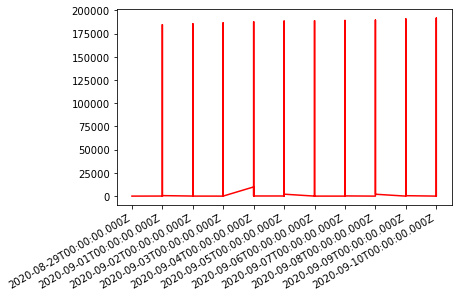

In [11]:
%%local
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(pdf['time'], pdf['casualties'], color='red')
plt.gcf().autofmt_xdate()
plt.show()

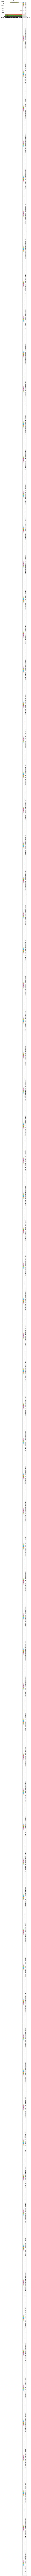

In [17]:
%%local
fig, ax = plt.subplots()
for country in pdf['iso_country_code']:
    dataframe = pdf.loc[pdf['iso_country_code'] == country]
    ax.plot(dataframe['time'], dataframe['casualties'], label=country)

ax.set_title('Casualties per country')
ax.legend(loc='upper right')

## seaborn

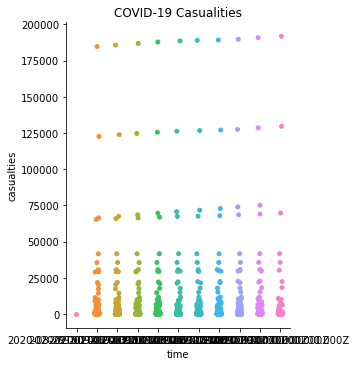

In [18]:
%%local
import matplotlib.pyplot as plt
import seaborn as sns   

sns.catplot(x ='time', y ='casualties', data = pdf)
plt.title('COVID-19 Casualities')
plt.show() 